I want to generate the three plots for two-step, linear, and inverse-linear

In [18]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

In [31]:
Q=6.61e-4
alpha=1

R1=1015.29
delta1=0.2063
R2=674.915
freq_list=np.logspace(-3,3,50)


In [6]:

theta_dip_list0=[]
theta_dip_list1=[]
theta_dip_list2=[]

for profile in ["TLMtwo","TLMlinnew","TLMilinnew"]:
    for alpha in [1,0.9,0.8]:
        for R1 in R2*np.linspace(1.1,10,50):
            if profile=="TLMtwo":
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit=profile)
            else:    
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit=profile)
            
            zexp=cmodel.predict(frequencies=freq_list)
            dip_angle=alpha*45-np.min(-np.angle(zexp,deg=True))
            theta_dip_list2.append(dip_angle)
        theta_dip_list1.append(theta_dip_list2)
        theta_dip_list2=[]
    theta_dip_list0.append(theta_dip_list1)
    theta_dip_list1=[]


In [35]:
freq_list=np.logspace(-3,3,500)

theta_dip_list0=[]
theta_dip_list1=[]
theta_dip_list2=[]

for profile in ["TLMtwo"]:
    for alpha in [1,0.9,0.8]:
        for R1 in R2*np.linspace(1,10,500):
            if profile=="TLMtwo":
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit=profile)
            else:    
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit=profile)
            
            zexp=cmodel.predict(frequencies=freq_list)
            dip_angle=alpha*45-np.min(-np.angle(zexp,deg=True))
            theta_dip_list2.append(dip_angle)
        theta_dip_list1.append(theta_dip_list2)
        theta_dip_list2=[]
    theta_dip_list0.append(theta_dip_list1)
    theta_dip_list1=[]

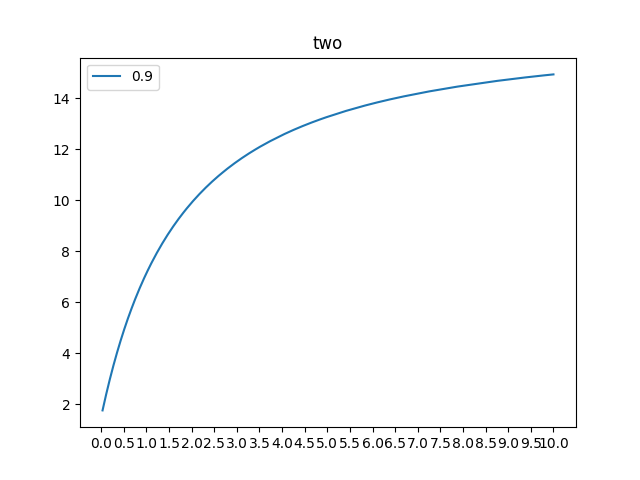

In [38]:
gg=theta_dip_list0[0]
hh=gg[0]
fig,axx=plt.subplots()
x=np.linspace(0.01,10,500)
for a,hh in zip([0.9],gg):
    axx.plot(x[1:len(x)],hh[1:len(hh)],label=a)
axx.legend()
axx.set_title("two")
axx.set_xticks(np.arange(0, 10.5, 0.5))

In [21]:
Q=6.61e-4
alpha=1

R1=1015.29
delta1=0.2063
R2=674.915
freq_list=np.logspace(-2,2,500)
mp.dps=400

theta_dip_list0=[]
theta_dip_list1=[]
theta_dip_list2=[]

for profile in ["TLMlinnew"]:
    for alpha in [0.9]:
        for R1 in R2*np.linspace(1.3,10,50):
            if profile=="TLMtwo":
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,delta1,alpha],circuit=profile)
            else:    
                cmodel=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit=profile)
            
            zexp=cmodel.predict(frequencies=freq_list)
            dip_angle=alpha*45-np.min(-np.angle(zexp,deg=True))
            theta_dip_list2.append(dip_angle)
        theta_dip_list1.append(theta_dip_list2)
        theta_dip_list2=[]
    theta_dip_list0.append(theta_dip_list1)
    theta_dip_list1=[]


In [30]:
import json
theta_list = theta_dip_list0
file_path = "theta_lin_alpha_9.json"
json_data = json.dumps(theta_list)

with open(file_path, "w") as file:
    file.write(json_data)

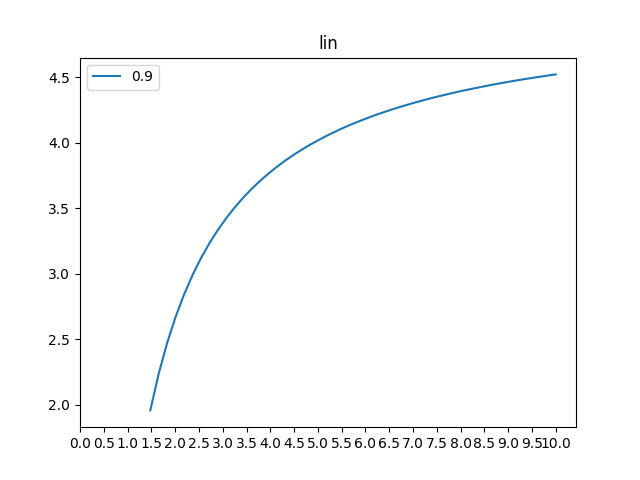

In [28]:
gg=theta_dip_list0[0]
hh=gg[0]
fig,axx=plt.subplots()
x=np.linspace(1.3,10,50)
for a,hh in zip([0.9],gg):
    axx.plot(x[1:len(x)],hh[1:len(hh)],label=a)
axx.legend()
axx.set_title("lin")
axx.set_xticks(np.arange(0, 10.5, 0.5))
# axx.set_yticks(np.arange(0, 12, 1))

In [ ]:
# print(np.linspace(1.1,10,50))


mp.dps=400

cmodel=CustomCircuit(initial_guess=[1.4*R2,1.4*R2*Q,R2*Q,alpha],circuit="TLMilinnew")
z_model=cmodel.predict(frequencies=freq_list)
dip_angle=alpha*45-np.min(-np.angle(z_model,deg=True))
print(dip_angle)

fig, ax= plt.subplots()
ax.plot(np.real(z_model),-np.imag(z_model))
ax.set_aspect("equal")

In [17]:
# import json
# theta_list = theta_dip_list0
# file_path = "theta_list.json"
# json_data = json.dumps(theta_list)

# with open(file_path, "w") as file:
#     file.write(json_data)

In [4]:
import json
file_path = "theta_list.json"

with open(file_path, "r") as file:
    json_data = file.read()

theta_list=json.loads(json_data)

Text(0.5, 1.0, 'ilin')

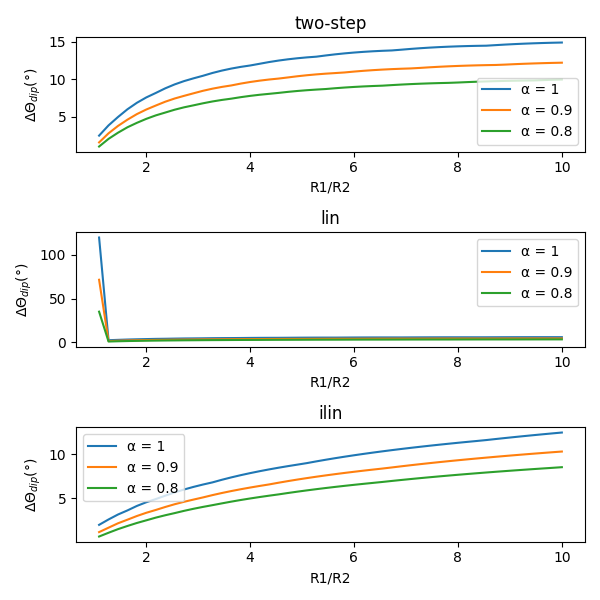

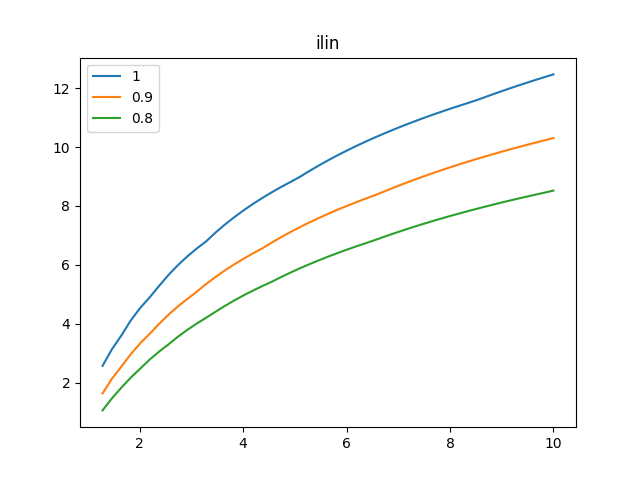

In [5]:
theta_dip_list0=theta_list
fig, [ax_two, ax_lin, ax_ilin]=plt.subplots(3,1)
fig.set_size_inches(6,6)
ax_list= [ax_two, ax_lin, ax_ilin]

for ax,theta,lbl in zip(ax_list,theta_dip_list0,["two-step","lin","ilin"]):
    ax.set_title(lbl)
    ax.set_xlabel("R1/R2")
    ax.set_ylabel("$\Delta \Theta_{dip} (\degree)$")
    for theta2,alpha in zip(theta,[1,0.9,0.8]):
        ax.plot(np.linspace(1.1,10,50),theta2,label=f"α = {alpha}")        
        # ax.grid(True)
        ax.legend()

plt.tight_layout()

gg=theta_dip_list0[2]
hh=gg[0]
fig,axx=plt.subplots()
x=np.linspace(1.1,10,50)
for a,hh in zip([1,0.9,0.8],gg):
    axx.plot(x[1:len(x)],hh[1:len(hh)],label=a)
axx.legend()
axx.set_title("ilin")